<a href="https://colab.research.google.com/github/anra8571/INFO5871FinalProject/blob/main/DoppelGANger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Note: You can select "GPU" on your Notebook
# Click "Runtime > Change runtime type" and select "T4 GPU"

In [2]:
#Uncomment to install the ydata-synthetic package
# !pip install ydata-synthetic==1.3.1

# Time Series Synthetic Data Generation with DoppelGANger

- DoppelGANger - Implemented accordingly to the [paper](https://dl.acm.org/doi/pdf/10.1145/3419394.3423643)
- This notebook is an example of how DoppelGANger can be used to generate synthetic time-series data

## Dataset

- The data used in this notebook is the [Measuring Broadband America](https://www.fcc.gov/reports-research/reports/measuring-broadband-america/raw-data-measuring-broadband-america-seventh) (MBA) Dataset, freely available on the Federal Communications Commission (FCC) website. You can also find it [here](https://drive.google.com/drive/folders/19hnyG8lN9_WWIac998rT6RtBB9Zit70X) and a CVS was left for your convenience [here](https://github.com/ydataai/ydata-synthetic/blob/dev/data/fcc_mba.csv). It comprises:
    - **2 continuous measurements** - traffic_byte_counter and ping_loss_rate
    - **3 categorical metadata features** - isp, technology, and state

In [3]:
!pip install ydata-synthetic==1.3.1

In [4]:
# Importing the necessay modules
import pandas as pd
import matplotlib.pyplot as plt
from ydata_synthetic.synthesizers.timeseries import TimeSeriesSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters

In [5]:
# Read the data
cntHb_data = pd.read_csv("cntHb_doppel_reduced.csv", usecols=range(1,4))
numerical_cols = ["cntHb"]
categorical_cols = [col for col in cntHb_data.columns if col not in numerical_cols]

In [6]:
# Preview the dataset
cntHb_data.head(28)

,cntHb,channel,taskLabel
0,-0.000762,1.0,1.0
1,-0.001043,1.0,1.0
2,-0.001324,1.0,1.0
3,-0.001604,1.0,1.0
4,-0.001883,1.0,1.0
5,-0.002161,1.0,1.0
6,-0.002437,1.0,1.0
7,-0.002712,1.0,1.0
8,-0.002984,1.0,1.0
9,-0.003255,1.0,1.0


In [7]:
# Defining model and training parameters
model_args = ModelParameters(batch_size=100,
                             lr=0.001,
                             betas=(0.2, 0.9),
                             latent_dim=20,
                             gp_lambda=2,
                             pac=1)

train_args = TrainParameters(epochs=400,
                             sequence_length=28,
                             sample_length=7,
                             rounds=1,
                             measurement_cols=["cntHb"])

In [8]:
# Training the DoppelGANger synthesizer
model_dop_gan = TimeSeriesSynthesizer(modelname='doppelganger',model_parameters=model_args)
model_dop_gan.fit(cntHb_data, train_args, num_cols=numerical_cols, cat_cols=categorical_cols)

/usr/local/lib/python3.10/dist-packages/ydata_synthetic/synthesizers/timeseries/doppelganger/network.py:13: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output = tf.compat.v1.layers.dense(
Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.10/dist-packages/ydata_synthetic/synthesizers/timeseries/doppelganger/network.py:274: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
100%|██████████| 400/400 [10:16<00:00,  1.54s/it]


In [9]:
# Generating new synthetic samples
synth_data = model_dop_gan.sample(n_samples=375000)
synth_df = pd.concat(synth_data, axis=0)

<ipython-input-10-364c4bddedab>:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


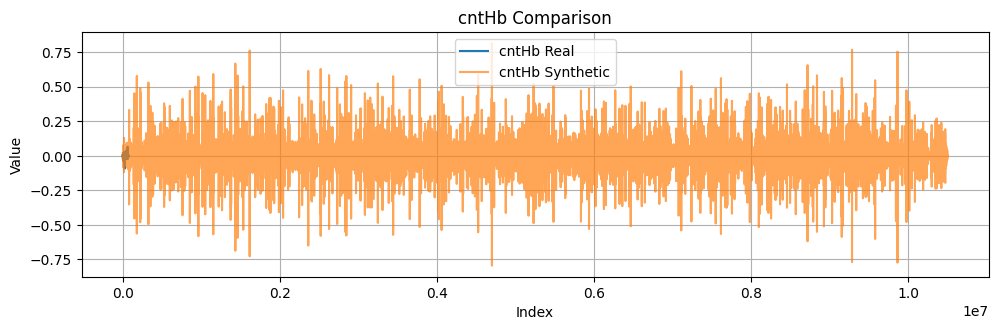

In [10]:
# Create a plot for each measurement column
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(cntHb_data['cntHb'].reset_index(drop=True), label='cntHb Real')
plt.plot(synth_df['cntHb'].reset_index(drop=True), label='cntHb Synthetic', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('cntHb Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# Divide original data into sequences
sequence_lenght = 28
mba_sequences = []

for i in range(0, len(cntHb_data), sequence_lenght):
    sequence = cntHb_data.iloc[i:i+sequence_lenght]
    mba_sequences.append(sequence)

print(f"Number of sequences: {len(mba_sequences)}")
print(f"Size of each sequence: {mba_sequences[0].shape} (rows x columns)")

Number of sequences: 2600
Size of each sequence: (28, 3) (rows x columns)


In [12]:
# Choose a random sequence
import numpy as np

In [13]:
obs = np.random.randint(len(mba_sequences))
print(obs)

610


In [16]:
print(synth_data[0:10])

[           cntHb  channel  taskLabel
0   8.716271e-14     30.0        3.0
1   7.630761e-14     30.0        3.0
2   7.664443e-14     30.0        3.0
3   5.585113e-14     30.0        3.0
4   5.657029e-14     30.0        3.0
5   3.951785e-14     30.0        3.0
6   3.579369e-14     30.0        3.0
7   4.170502e-14     30.0        3.0
8   3.309743e-14     30.0        3.0
9   3.221932e-14     30.0        3.0
10  3.271631e-14     30.0        3.0
11  2.828978e-14     30.0        3.0
12  2.454613e-14     30.0        3.0
13  1.997797e-14     30.0        3.0
14  2.311800e-14     30.0        3.0
15  1.068194e-14     30.0        3.0
16  1.015493e-14     30.0        3.0
17  4.127754e-15     30.0        3.0
18  9.302014e-15     30.0        3.0
19  4.761918e-16     30.0        3.0
20 -1.850066e-15     30.0        3.0
21 -8.814486e-15     30.0        3.0
22 -5.646877e-15     30.0        3.0
23 -8.948825e-15     30.0        3.0
24 -4.344212e-15     30.0        3.0
25 -1.097738e-14     30.0        3.0


In [18]:
# # Create a plot for each measurement column
# print(synth_data[1])
# print(mba_sequences[1])
# plt.figure(figsize=(10, 6))

# plt.subplot(2, 1, 1)
# plt.plot(mba_sequences[1]['cntHb'].reset_index(drop=True), label='Real cntHb')
# plt.plot(synth_data[1]['cntHb'].reset_index(drop=True), label='Synthetic cntHb', alpha=0.7)
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('cntHb Comparison')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

In [17]:
synth_df.to_csv('synthetic_cntHb_reduced_375000.csv', index=False)